# Hackathon - zomato app data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
df1 = pd.read_csv('Desktop/zomato_data/zomato_data.csv')
df1.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [4]:
df2 = pd.read_csv('Desktop/zomato_data/Geographical Coordinates.csv')
df2.head()

,listed_incity,Latitude,Longitude
0,Banashankari,12.939333,77.553982
1,Bannerghatta Road,12.952660,77.605048
2,Basavanagudi,12.941726,77.575502
3,Bellandur,12.925352,77.675941
4,Brigade Road,12.967358,77.606435


# 1. What is the shape of the given dataset?

In [5]:
df1.shape

(51717, 10)

In [6]:
df2.shape

(26, 3)

# 2. How many restaurants serve North Indian cuisine?


In [8]:
df1['cuisines'].str.contains('North Indian').value_counts()

cuisines
False    30587
True     21085
Name: count, dtype: int64

# 3. What cuisine is most commonly offered by     restaurants in Bangalore?

In [9]:
df1.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [17]:
df1['cuisines'] = df1['cuisines'].fillna('Other')

In [18]:
df1['cuisines_split'] = df1['cuisines'].str.split(',')

In [19]:
df1['cuisines_split'] = df1['cuisines_split'].apply(lambda x: [i.strip() for i in x])

In [20]:
exploded = df1.explode('cuisines_split')

In [21]:
exploded['cuisines_split'].value_counts()

cuisines_split
North Indian    21085
Chinese         15547
South Indian     8644
Fast Food        8096
Biryani          6492
                ...  
Sindhi              4
Pan Asian           3
Hot dogs            3
Indian              2
Malwani             2
Name: count, Length: 108, dtype: int64

# Data Cleaning and Preprocessing

In [22]:
df1.head(1)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,cuisines_split
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,"[North Indian, Mughlai, Chinese]"


In [23]:
df1['approx_costfor_two_people'].value_counts()

approx_costfor_two_people
300      7576
400      6562
500      4980
200      4857
600      3714
         ... 
60          1
5,000       1
3,700       1
469         1
160         1
Name: count, Length: 70, dtype: int64

In [24]:
df1['approx_costfor_two_people'] = df1['approx_costfor_two_people'].str.replace(',', '', regex=False)

In [25]:
df1['approx_costfor_two_people'] = pd.to_numeric(df1['approx_costfor_two_people'], errors='coerce')

In [26]:
median_cost = df1['approx_costfor_two_people'].median()
df1['approx_costfor_two_people'] = df1['approx_costfor_two_people'].fillna(median_cost)

In [29]:
df1.head(1)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,cuisines_split
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,"[North Indian, Mughlai, Chinese]"


In [30]:
df1['rate'] = df1['rate'].replace('-', np.nan)
df1['rate'] = df1['rate'].str.replace('/5', '', regex=False)
df1['rate'] = pd.to_numeric(df1['rate'], errors='coerce')

In [31]:
median_rating = df1['rate'].median()
df1['rate'] = df1['rate'].fillna(median_rating)

In [33]:
df1['dish_liked'] = df1['dish_liked'].fillna('Not Available')
df1['rest_type'] = df1['rest_type'].fillna('Unknown')

In [36]:
median_votes = df1['votes'].median()
df1['votes'] = df1['votes'].fillna(median_votes)

In [37]:
binary_mapping = {'Yes': 1, 'No': 0}

df1['online_order'] = df1['online_order'].replace(binary_mapping)
df1['book_table'] = df1['book_table'].replace(binary_mapping)

C:\Users\santosh\AppData\Local\Temp\ipykernel_29876\3403225874.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['online_order'] = df1['online_order'].replace(binary_mapping)
C:\Users\santosh\AppData\Local\Temp\ipykernel_29876\3403225874.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['book_table'] = df1['book_table'].replace(binary_mapping)


In [38]:
df1['approx_costfor_two_people'] = df1['approx_costfor_two_people'].astype(int)

# 4. Which locality in Bangalore has the highest average cost for dining (for two people)?

In [44]:
avg_cost_by_locality = df1.groupby('listed_incity')['approx_costfor_two_people'].mean()

In [47]:
highest_avg_cost_locality = avg_cost_by_locality.idxmax()
highest_avg_cost_locality

'Church Street'

In [48]:
highest_avg_cost_value = avg_cost_by_locality.max()
highest_avg_cost_value

770.3612479474549

# 5. Which restaurant type has the top rating with over 1000 votes?


In [53]:
filtered_df = df1[df1['votes'] > 1000]

In [56]:
top_restaurant_type = filtered_df.groupby('rest_type')['rate'].max()

In [59]:
top_restaurant_type

rest_type
Bakery                         4.8
Bakery, Cafe                   4.4
Bar                            4.8
Bar, Casual Dining             4.6
Bar, Quick Bites               4.0
Cafe                           4.6
Cafe, Bakery                   4.4
Cafe, Casual Dining            4.7
Cafe, Dessert Parlor           4.7
Casual Dining                  4.9
Casual Dining, Bar             4.9
Casual Dining, Cafe            4.6
Casual Dining, Irani Cafee     4.5
Casual Dining, Microbrewery    4.5
Casual Dining, Pub             4.6
Club                           4.1
Delivery                       4.6
Dessert Parlor                 4.9
Dessert Parlor, Cafe           4.6
Fine Dining                    4.6
Fine Dining, Lounge            4.4
Lounge                         4.6
Lounge, Cafe                   4.0
Lounge, Casual Dining          4.3
Lounge, Microbrewery           3.8
Microbrewery                   4.9
Microbrewery, Bar              4.5
Microbrewery, Casual Dining    4.7
Microbrewe

In [60]:
top_restaurant_type.max()

4.9

In [58]:
top_restaurant_type.idxmax()

'Casual Dining'

# 6. How much does it cost at minimum to eat out in Bangalore?

In [71]:
df1['approx_costfor_two_people'].value_counts()

approx_costfor_two_people
300     7576
400     6908
500     4980
200     4857
600     3714
        ... 
60         1
5000       1
3700       1
469        1
160        1
Name: count, Length: 70, dtype: int64

# 7. What percentage of total online orders is received by restaurants in Banashankari?

In [75]:
online_orders_df = df1[df1['online_order'] == 1]


In [85]:
total_online_orders = online_orders_df.shape[0]
total_online_orders

30444

In [86]:
banashankari_orders = online_orders_df[online_orders_df['listed_incity'] == 'Banashankari'].shape[0]
banashankari_orders

546

In [103]:
percentage = (banashankari_orders / total_online_orders)*100
percentage

1.7934568387859677

# 8. Which locality has the most restaurants with over 500 votes and a rating below 3.0?

In [108]:
filtered_df = df1[(df1['votes'] > 500) & (df1['rate'] < 3.0)]

In [109]:
filtered_df['listed_incity'].value_counts()

listed_incity
Brookefield              8
Whitefield               6
Indiranagar              4
Old Airport Road         4
Bellandur                3
Marathahalli             3
Banashankari             2
Koramangala 4th Block    2
Koramangala 5th Block    2
Koramangala 6th Block    2
Koramangala 7th Block    2
Sarjapur Road            2
HSR                      1
Kalyan Nagar             1
Kammanahalli             1
Name: count, dtype: int64

In [110]:
count_by_locality = filtered_df['listed_incity'].value_counts()

In [111]:
count_by_locality.idxmax()

'Brookefield'

In [112]:
count_by_locality.max()

8

# 9. Which locality in Bangalore should Zomato target for expansion based on restaurant type diversity?

In [116]:
df1.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype',
       'listed_incity', 'cuisines_split'],
      dtype='object')

In [118]:
df1.groupby('listed_incity')['rest_type'].nunique()

listed_incity
BTM                      62
Banashankari             37
Bannerghatta Road        47
Basavanagudi             40
Bellandur                49
Brigade Road             61
Brookefield              50
Church Street            61
Electronic City          35
Frazer Town              51
HSR                      50
Indiranagar              56
JP Nagar                 49
Jayanagar                53
Kalyan Nagar             42
Kammanahalli             42
Koramangala 4th Block    59
Koramangala 5th Block    58
Koramangala 6th Block    59
Koramangala 7th Block    58
Lavelle Road             59
MG Road                  59
Malleshwaram             47
Marathahalli             44
New BEL Road             35
Old Airport Road         50
Rajajinagar              46
Residency Road           57
Sarjapur Road            45
Whitefield               54
Name: rest_type, dtype: int64

In [120]:
rest_type_diversity = df1.groupby('listed_incity')['rest_type'].nunique()

In [123]:
target_locality = rest_type_diversity.idxmax()
target_locality

'BTM'

In [124]:
diversity_count = rest_type_diversity.max()
diversity_count

62

# 10. What's the average cost difference between buffet and delivery restaurants?

In [126]:
df1['listed_intype'].value_counts()

listed_intype
Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: count, dtype: int64

In [127]:
buffet_df = df1[df1['listed_intype'].str.contains('Buffet')]
delivery_df = df1[df1['listed_intype'].str.contains('Delivery')]

In [130]:
avg_cost_buffet = buffet_df['approx_costfor_two_people'].mean()
avg_cost_buffet

1295.3514739229024

In [131]:
avg_cost_delivery = delivery_df['approx_costfor_two_people'].mean()
avg_cost_delivery

464.1001079330815

In [133]:
cost_difference = avg_cost_buffet - avg_cost_delivery
cost_difference

831.2513659898209

# 11 . What is the maximum number of votes received by any restaurant with online ordering?

In [134]:
online_df = df1[df1['online_order'] == 1]
online_df['votes'].max()

16832

# 12. What is the average rating of restaurants that serve both North Indian and Chinese cuisines?

In [135]:
df1.head(1)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,cuisines_split
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,"[North Indian, Mughlai, Chinese]"


In [137]:
n_c = df1['cuisines'].str.contains('North Indian', na=False) & df1['cuisines'].str.contains('Chinese', na=False)

In [142]:
north_indian_chinese_df = df1[n_c]
north_indian_chinese_df.head(1)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,cuisines_split
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,"[North Indian, Mughlai, Chinese]"


In [143]:
north_indian_chinese_df['rate'].mean()

3.5919080217658412

# 13. What is the most profitable area for Zomato based on potential revenue estimation?

In [145]:
df1['estimated_revenue'] = df1['votes'] * df1['approx_costfor_two_people']
df1.head(1)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,cuisines_split,estimated_revenue
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,"[North Indian, Mughlai, Chinese]",620000


In [147]:
revenue_by_locality = df1.groupby('listed_incity')['estimated_revenue'].sum()

In [148]:
revenue_by_locality.idxmax()

'Koramangala 7th Block'

In [149]:
revenue_by_locality.max()

1006195610

# 14. If Zomato wants to reduce customer complaints, which restaurant type should they focus on?

In [152]:
low_rated_df = df1[df1['rate'] < 3.0]

In [153]:
low_rated_df['rest_type'].value_counts()

rest_type
Quick Bites                    738
Casual Dining                  730
Cafe                           182
Delivery                       115
Takeaway, Delivery              93
Food Court                      64
Bakery, Quick Bites             52
Dessert Parlor                  36
Unknown                         35
Casual Dining, Bar              27
Pub                             20
Beverage Shop                   18
Lounge                          17
Bakery                          16
Bar, Casual Dining              12
Quick Bites, Cafe               12
Quick Bites, Sweet Shop         11
Bar                             10
Sweet Shop                       9
Food Court, Quick Bites          9
Dessert Parlor, Cafe             9
Sweet Shop, Quick Bites          8
Quick Bites, Dessert Parlor      8
Bakery, Cafe                     8
Quick Bites, Food Court          5
Mess                             4
Bakery, Dessert Parlor           4
Kiosk                            3
Dessert Pa

In [154]:
complaint_prone_types = low_rated_df['rest_type'].value_counts()

In [155]:
complaint_prone_types.idxmax()

'Quick Bites'

In [156]:
complaint_prone_types.max()

738

# 15. In which area should Zomato invest by considering high rating (rate > 4.2), high number of votes (> 500) and including online orders?

In [157]:
target_df = df1[(df1['rate'] > 4.2) & (df1['votes'] > 500) & (df1['online_order'] == 1)]

In [158]:
area_counts = target_df['listed_incity'].value_counts()
area_counts

listed_incity
Koramangala 7th Block    97
MG Road                  97
Church Street            95
Koramangala 4th Block    95
Brigade Road             94
Koramangala 5th Block    92
BTM                      91
Koramangala 6th Block    90
Lavelle Road             82
Residency Road           81
Indiranagar              80
Old Airport Road         64
Frazer Town              56
Jayanagar                56
Bellandur                55
Whitefield               44
Sarjapur Road            43
HSR                      41
JP Nagar                 38
Brookefield              34
Marathahalli             32
Malleshwaram             31
Basavanagudi             24
Kammanahalli             23
Kalyan Nagar             23
Rajajinagar              22
Bannerghatta Road        19
Banashankari             11
New BEL Road              9
Electronic City           7
Name: count, dtype: int64

In [159]:
area_counts.idxmax()

'Koramangala 7th Block'

In [160]:
area_counts.max()


97

# Exploratory data analysis

In [184]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [185]:
from collections import Counter

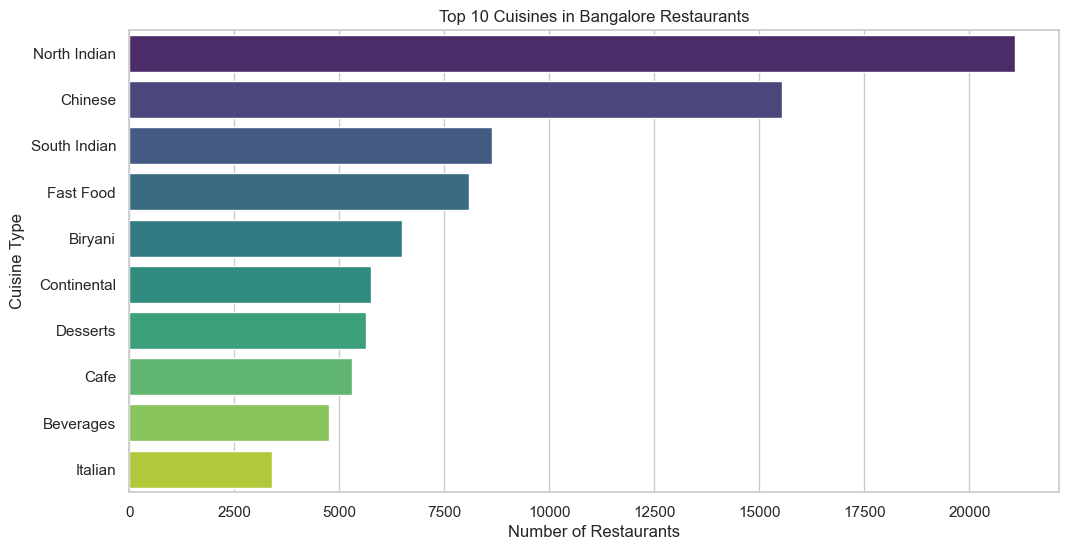

In [187]:
cuisine_list = df1['cuisines_split'].dropna().explode()
top_cuisines = pd.Series(cuisine_list).value_counts().head(10)

sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")
plt.title("Top 10 Cuisines in Bangalore Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.show()

C:\Users\santosh\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


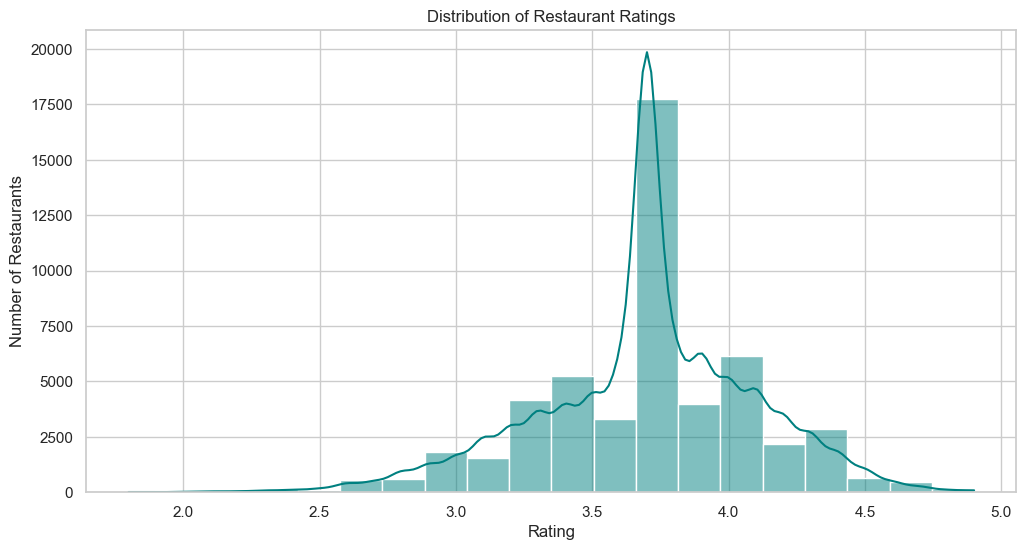

In [188]:


sns.histplot(df1['rate'].dropna(), bins=20, kde=True, color='teal')
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.show()

C:\Users\santosh\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


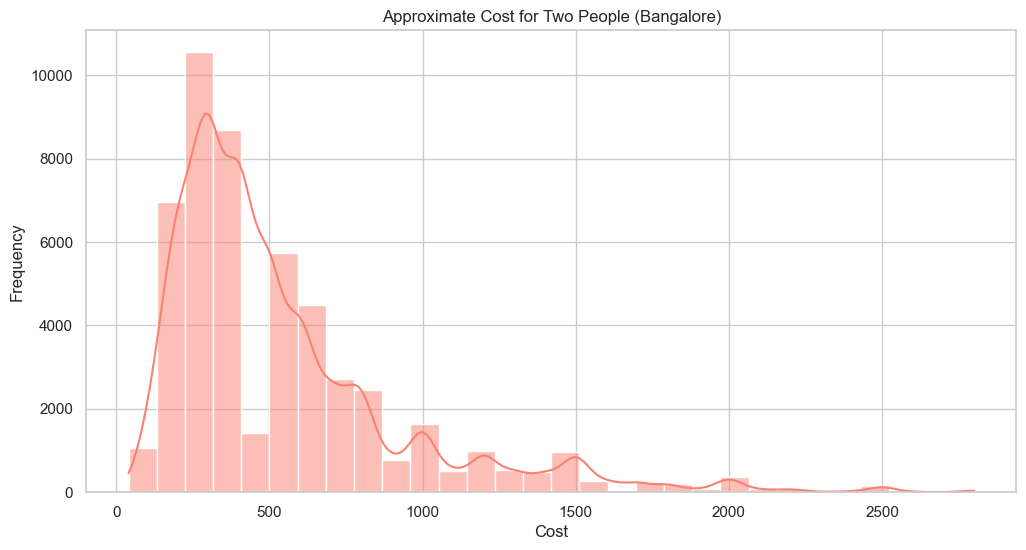

In [189]:
cost_clean = df1[df1['approx_costfor_two_people'] < 3000]

sns.histplot(cost_clean['approx_costfor_two_people'], bins=30, color='salmon', kde=True)
plt.title("Approximate Cost for Two People (Bangalore)")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.show()

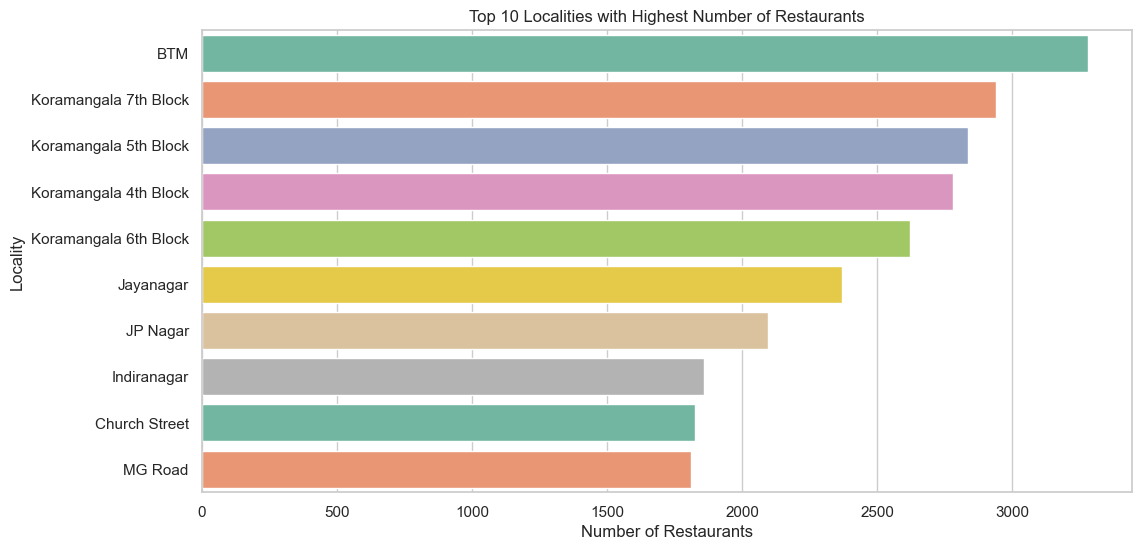

In [190]:
top_localities = df1['listed_incity'].value_counts().head(10)

sns.barplot(x=top_localities.values, y=top_localities.index, palette='Set2')
plt.title("Top 10 Localities with Highest Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Locality")
plt.show()

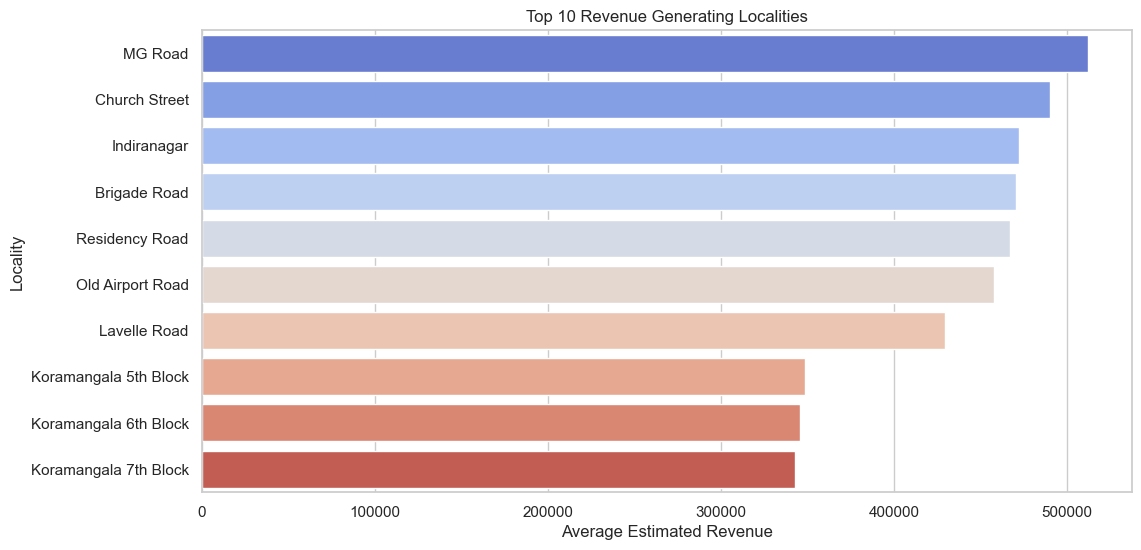

In [191]:
revenue_by_locality = df1.groupby('listed_incity')['estimated_revenue'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=revenue_by_locality.values, y=revenue_by_locality.index, palette='coolwarm')
plt.title("Top 10 Revenue Generating Localities")
plt.xlabel("Average Estimated Revenue")
plt.ylabel("Locality")
plt.show()

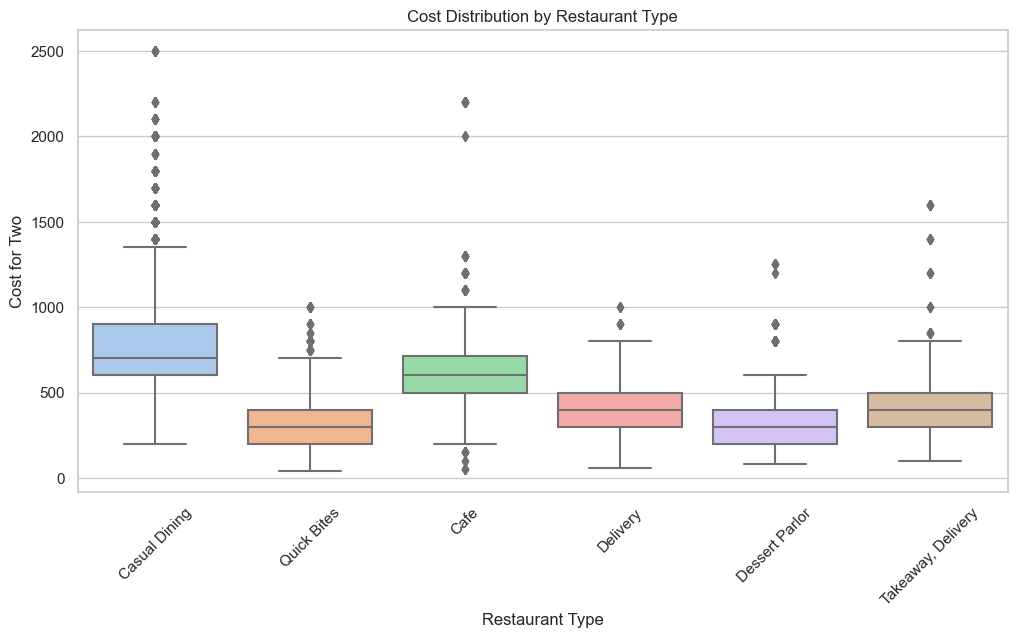

In [192]:
top_rest_types = df1['rest_type'].value_counts().head(6).index
sns.boxplot(data=df1[df1['rest_type'].isin(top_rest_types)],
            x='rest_type', y='approx_costfor_two_people', palette="pastel")
plt.xticks(rotation=45)
plt.title("Cost Distribution by Restaurant Type")
plt.ylabel("Cost for Two")
plt.xlabel("Restaurant Type")
plt.show()

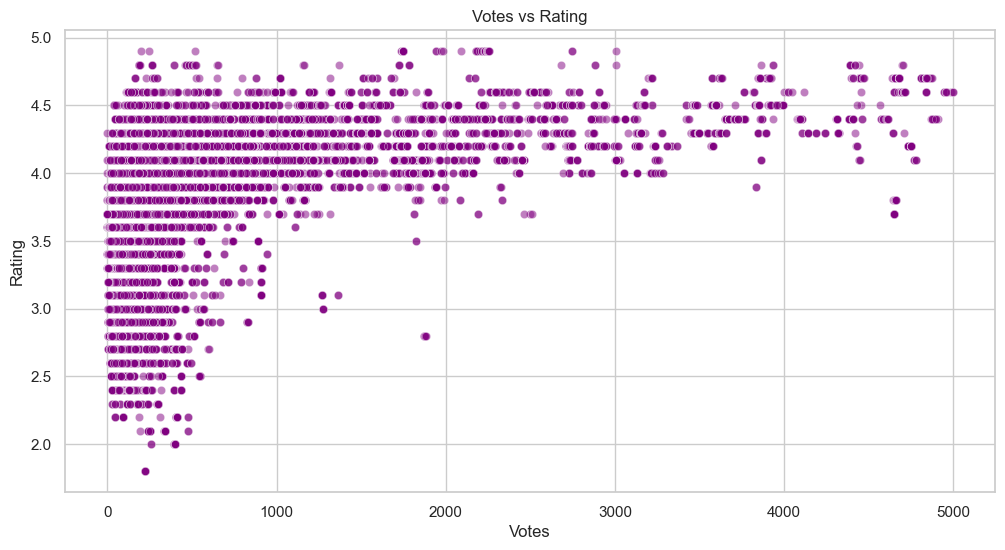

In [194]:
sns.scatterplot(data=df1[df1['votes'] < 5000], x='votes', y='rate', alpha=0.5, color='purple')
plt.title("Votes vs Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

# Interactive Restaurant Density Mapping 

In [163]:
merge_df  = pd.merge(df1, df2,on='listed_incity', how='left')

In [164]:
merge_df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,cuisines_split,estimated_revenue,Latitude,Longitude
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,"[North Indian, Mughlai, Chinese]",620000,12.939333,77.553982
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari,"[Chinese, North Indian, Thai]",629600,12.939333,77.553982
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari,"[Cafe, Mexican, Italian]",734400,12.939333,77.553982
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari,"[South Indian, North Indian]",26400,12.939333,77.553982
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari,"[North Indian, Rajasthani]",99600,12.939333,77.553982


In [174]:
merge_df = merge_df.dropna(subset=['Latitude', 'Longitude'])

In [165]:
from folium.plugins import MarkerCluster
import folium
from IPython.display import IFrame

In [166]:
map_1 = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

marker_cluster = MarkerCluster().add_to(map_1)

In [169]:
merge_df.head(1)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,cuisines_split,estimated_revenue,Latitude,Longitude
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,"[North Indian, Mughlai, Chinese]",620000,12.939333,77.553982


In [176]:
for i, row in merge_df.iterrows():
    if not pd.isna(row['Latitude'] and not pd.isna(row['Longitude'])):
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup  = f"{row['listed_incity']}<br>Rating: {row['rate']}<br>Cost: {row['approx_costfor_two_people']}<br>Restaurant type: {row['rest_type']}"
        ).add_to(marker_cluster)
        
map_1.save('Desktop/zomato_data/restaurant_density.html')

In [182]:
from IPython.display import IFrame

IFrame('Desktop/zomato_data/restaurant_density.html', width=1000, height=500)

# Cuisine-Specific Map – Italian Restaurants

In [178]:
merge_df.head(1)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,cuisines_split,estimated_revenue,Latitude,Longitude
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,"[North Indian, Mughlai, Chinese]",620000,12.939333,77.553982


In [179]:
italian_df = merge_df[merge_df['cuisines'].str.contains('Italian', na =False)]


In [180]:
map_2 = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

for i, row in italian_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup  = f"{row['listed_incity']}<br>Cuisine: {row['cuisines']}<br>Cost: {row['approx_costfor_two_people']}",
        icon= folium.Icon(color = 'purple')
        ).add_to(map_2)
    
map_2.save('Desktop/zomato_data/italian_spots.html')

In [181]:
from IPython.display import IFrame

IFrame('Desktop/zomato_data/italian_spots.html', width=1000, height=500)